In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')

In [2]:
ds_health = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset',engine='openpyxl')

In [3]:
ds_health.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
ds_health.columns.values.tolist()

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_Freq_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorde

In [5]:
ds_health.to_csv('Healthcare_dataset.csv',index=False)

In [6]:
columns = ['Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment','Persistency_Flag']
df = ds_health[columns]

In [7]:
df.head()

,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Persistency_Flag
0,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Persistent
1,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Non-Persistent
2,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Non-Persistent
3,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Non-Persistent
4,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Non-Persistent


In [8]:
df.dtypes

Frag_Frac_During_Rx        object
Risk_Segment_Prior_Ntm     object
Tscore_Bucket_Prior_Ntm    object
Risk_Segment_During_Rx     object
Tscore_Bucket_During_Rx    object
Change_T_Score             object
Change_Risk_Segment        object
Persistency_Flag           object
dtype: object

In [37]:
df['Change_Risk_Segment'].unique()

array(['Unknown', 'No change', 'Worsened', 'Improved'], dtype=object)

In [26]:
df.shape

(3424, 8)

In [27]:
freq = df.groupby(['Change_Risk_Segment']).count() 
freq

,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Persistency_Flag
Change_Risk_Segment,,,,,,,
Improved,22,22,22,22,22,22,22
No change,1052,1052,1052,1052,1052,1052,1052
Unknown,2229,2229,2229,2229,2229,2229,2229
Worsened,121,121,121,121,121,121,121


In [28]:
2229 * 100 / 3424

65.09929906542057

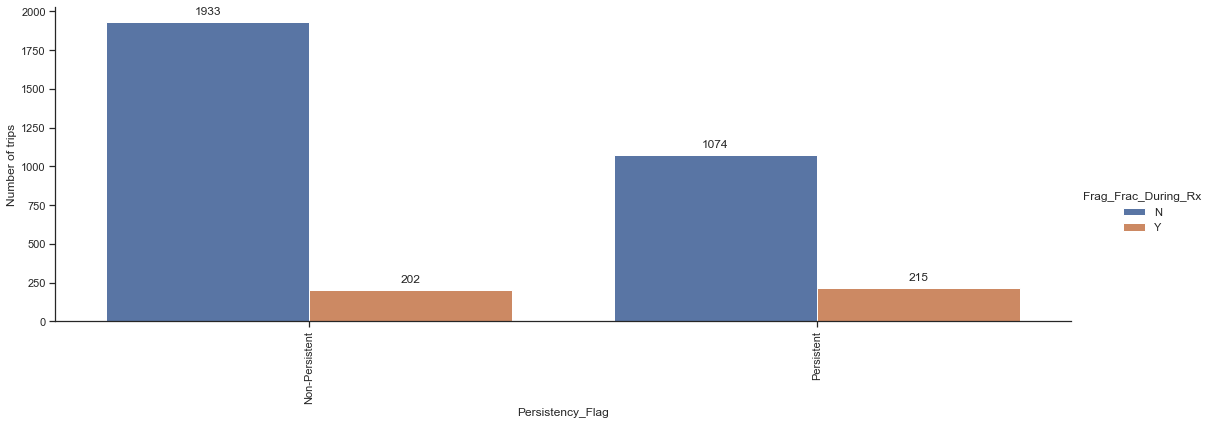

In [29]:
data_g = df.groupby(['Persistency_Flag','Frag_Frac_During_Rx'], as_index = False).count()

fg = seaborn.catplot(x='Persistency_Flag', y='Change_T_Score', hue='Frag_Frac_During_Rx', data=data_g, kind='bar',aspect=3)
fg.set_ylabels('Number of trips')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

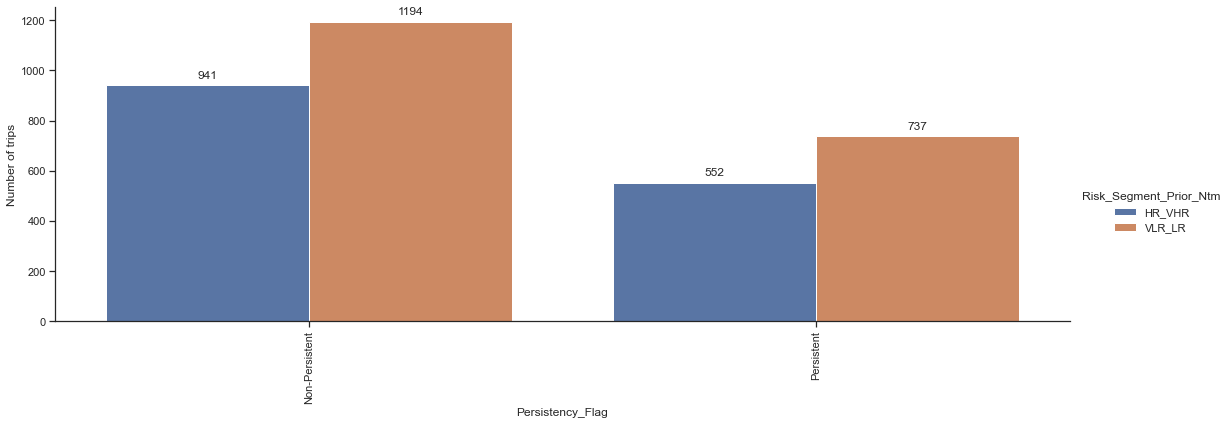

In [30]:
data_g = ds_health.groupby(['Persistency_Flag','Risk_Segment_Prior_Ntm'], as_index = False).count()

fg = seaborn.catplot(x='Persistency_Flag', y='Change_T_Score', hue='Risk_Segment_Prior_Ntm', data=data_g, kind='bar',aspect=3)
fg.set_ylabels('Number of trips')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

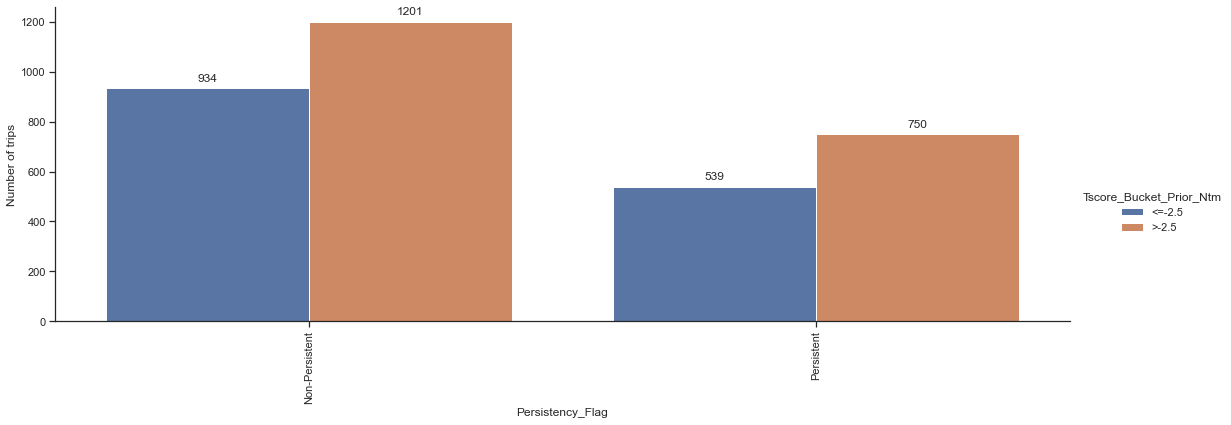

In [31]:
data_g = ds_health.groupby(['Persistency_Flag','Tscore_Bucket_Prior_Ntm'], as_index = False).count()

fg = seaborn.catplot(x='Persistency_Flag', y='Change_T_Score', hue='Tscore_Bucket_Prior_Ntm', data=data_g, kind='bar',aspect=3)
fg.set_ylabels('Number of trips')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [17]:
def chi_square(df,var1,var2):
    df_ct = pd.crosstab(df[var1],df[var2])
    df_ct['Total']=df_ct.sum(axis=1)
    df_ct.loc['Total1'] = df_ct.sum(axis = 0, skipna = True)
    df_cq = pd.DataFrame()
    df_cq['Observed'] = np.array([df_ct.iloc[0][0],df_ct.iloc[0][1],df_ct.iloc[1][0],df_ct.iloc[1][1]])
    df_cq['Expected'] = np.array([(df_ct.iloc[0][2] * df_ct.iloc[2][0] / df_ct.iloc[2][2]),
                                  (df_ct.iloc[0][2] * df_ct.iloc[2][1] / df_ct.iloc[2][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[2][0] / df_ct.iloc[2][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[2][1] / df_ct.iloc[2][2]),
                                 ])
    df_cq['Chi-Square'] = ((df_cq['Observed'] - df_cq['Expected']) ** 2) / df_cq['Expected']
    chi_square =  df_cq['Chi-Square'].sum()
    return df_cq,chi_square

In [31]:
def chi_square_3(df,var1,var2):
    df_ct = pd.crosstab(df[var1],df[var2])
    df_ct['Total']=df_ct.sum(axis=1)
    df_ct.loc['Total1'] = df_ct.sum(axis = 0, skipna = True)
    df_cq = pd.DataFrame()
    df_cq['Observed'] = np.array([df_ct.iloc[0][0],df_ct.iloc[0][1],df_ct.iloc[1][0],df_ct.iloc[1][1],df_ct.iloc[2][0],df_ct.iloc[2][1]])
    df_cq['Expected'] = np.array([(df_ct.iloc[0][2] * df_ct.iloc[3][0] / df_ct.iloc[3][2]),
                                  (df_ct.iloc[0][2] * df_ct.iloc[3][1] / df_ct.iloc[3][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[3][0] / df_ct.iloc[3][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[3][1] / df_ct.iloc[3][2]),
                                  (df_ct.iloc[2][2] * df_ct.iloc[3][0] / df_ct.iloc[3][2]),
                                  (df_ct.iloc[2][2] * df_ct.iloc[3][1] / df_ct.iloc[3][2]),
                                 ])
    df_cq['Chi-Square'] = ((df_cq['Observed'] - df_cq['Expected']) ** 2) / df_cq['Expected']
    chi_square =  df_cq['Chi-Square'].sum()
    return df_cq,chi_square

In [41]:
def chi_square_4(df,var1,var2):
    df_ct = pd.crosstab(df[var1],df[var2])
    df_ct['Total']=df_ct.sum(axis=1)
    df_ct.loc['Total1'] = df_ct.sum(axis = 0, skipna = True)
    df_cq = pd.DataFrame()
    df_cq['Observed'] = np.array([df_ct.iloc[0][0],df_ct.iloc[0][1],df_ct.iloc[1][0],df_ct.iloc[1][1],df_ct.iloc[2][0],df_ct.iloc[2][1],df_ct.iloc[3][0],df_ct.iloc[3][1]])
    df_cq['Expected'] = np.array([(df_ct.iloc[0][2] * df_ct.iloc[4][0] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[0][2] * df_ct.iloc[4][1] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[4][0] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[1][2] * df_ct.iloc[4][1] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[2][2] * df_ct.iloc[4][0] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[2][2] * df_ct.iloc[4][1] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[3][2] * df_ct.iloc[4][0] / df_ct.iloc[4][2]),
                                  (df_ct.iloc[3][2] * df_ct.iloc[4][1] / df_ct.iloc[4][2]),
                                 ])
    df_cq['Chi-Square'] = ((df_cq['Observed'] - df_cq['Expected']) ** 2) / df_cq['Expected']
    chi_square =  df_cq['Chi-Square'].sum()
    return df_ct,df_cq,chi_square

In [33]:
chi_square(df,'Frag_Frac_During_Rx','Persistency_Flag')

(   Observed     Expected  Chi-Square
 0      1933  1874.983937    1.795143
 1      1074  1132.016063    2.973336
 2       202   260.016063   12.944829
 3       215   156.983937   21.440815,
 39.154122704885225)

In [34]:
chi_square(df,'Risk_Segment_Prior_Ntm','Persistency_Flag')

(   Observed     Expected  Chi-Square
 0       941   930.944801    0.108607
 1       552   562.055199    0.179888
 2      1194  1204.055199    0.083972
 3       737   726.944801    0.139085,
 0.5115518918661821)

In [35]:
chi_square(df,'Tscore_Bucket_Prior_Ntm','Persistency_Flag')

(   Observed     Expected  Chi-Square
 0       934   918.474007    0.262453
 1       539   554.525993    0.434707
 2      1201  1216.525993    0.198152
 3       750   734.474007    0.328203,
 1.2235147986233286)

In [32]:
chi_square_3(df,'Risk_Segment_During_Rx','Persistency_Flag')

(   Observed    Expected  Chi-Square
 0       527  601.715829    9.277561
 1       438  363.284171   15.366635
 2      1082  933.438960   23.644163
 3       415  563.561040   39.162364
 4       526  599.845210    9.090870
 5       436  362.154790   15.057415,
 111.59900776382307)

In [36]:
chi_square_3(df,'Tscore_Bucket_During_Rx','Persistency_Flag')

(   Observed    Expected  Chi-Square
 0       570  634.139895    6.487411
 1       447  382.860105   10.745246
 2       483  567.421145   12.560212
 3       427  342.578855   20.803764
 4      1082  933.438960   23.644163
 5       415  563.561040   39.162364,
 113.40315953646167)

In [42]:
chi_square_4(df,'Change_T_Score','Persistency_Flag')

(Persistency_Flag  Non-Persistent  Persistent  Total
 Change_T_Score                                     
 Improved                      28          66     94
 No change                    959         701   1660
 Unknown                     1082         415   1497
 Worsened                      66         107    173
 Total1                      2135        1289   3424,
    Observed     Expected  Chi-Square
 0        28    58.612734   15.988667
 1        66    35.387266   26.482392
 2       959  1035.075935    5.591423
 3       701   624.924065    9.261202
 4      1082   933.438960   23.644163
 5       415   563.561040   39.162364
 6        66   107.872371   16.253425
 7       107    65.127629   26.920917,
 163.3045524871112)

In [43]:
chi_square_4(df,'Change_Risk_Segment','Persistency_Flag')

(Persistency_Flag     Non-Persistent  Persistent  Total
 Change_Risk_Segment                                   
 Improved                          9          13     22
 No change                       621         431   1052
 Unknown                        1457         772   2229
 Worsened                         48          73    121
 Total1                         2135        1289   3424,
    Observed     Expected  Chi-Square
 0         9    13.717874    1.622579
 1        13     8.282126    2.687514
 2       621   655.963785    1.863619
 3       431   396.036215    3.086754
 4      1457  1389.870035    3.242341
 5       772   839.129965    5.370363
 6        48    75.448306    9.985771
 7        73    45.551694   16.539659,
 44.398599446550534)